# Naive Bayes

naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.<br>
The Naive Bayes classifier aggregates information using conditional probability with an assumption of independence among features.Such a model is called a generative model because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

# Dataset

Dataset that I am using is about users in social networks. It describes ocial network has several business clients which can put their ads on the social network and one of their clients is a car company who has just launched their brand new luxury SUV for a ridiculous price and we're trying to see which of these users of the social network are going to buy this brand-new SUV.<br>


We are going to build a model that is going to predict if users choose to buy or not based on two variables which are going to be the age and the estimated salary<br>

**Goal is to find right users in right category. We will use classifier to predict user choice to purchase SUV or not**<br>

Key variables/features are : <br>
User ID<br>
Gener: Male or female<br>
Age<br>
Estimated Salary<br>
**Dependent Variable**-Purchased: Categorical variable showing if item is purchased or not.<br>

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Splitting the dataset into the Dependent "y" and Independent features"X"

In [4]:
X= dataset[["Age" , "EstimatedSalary"]]
y=dataset.Purchased

In [5]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
type(y)

pandas.core.series.Series

In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Fitting classifier to the Training set

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

## Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

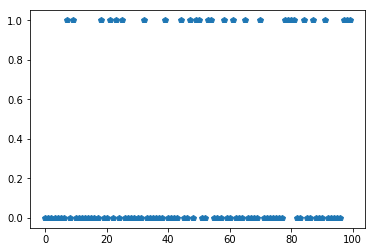

In [14]:
import matplotlib.pyplot as plt
plt.plot(y_pred, "p")

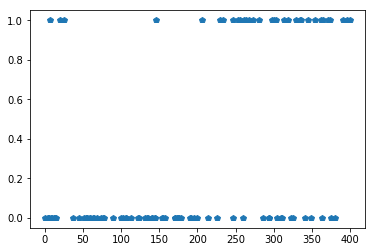

In [15]:
plt.plot(y_test, "p")

## Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
Key matrix elements are:<br>
true positives (TP): These are cases in which we predicted yes (they have the purchased), and they do have the purchases.<br>
true negatives (TN): We predicted no, and they don't have purchased.<br>
false positives (FP): We predicted yes, but they have actually not the purchased. (Also known as a "Type I error.")<br>
false negatives (FN): We predicted no, but they actually ourchased. (Also known as a "Type II error.")<br>

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

correct: 65+25<br>
Incorrect:7+3

# Checking accuracy score in Percentage

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

### Visualizing the Training set results

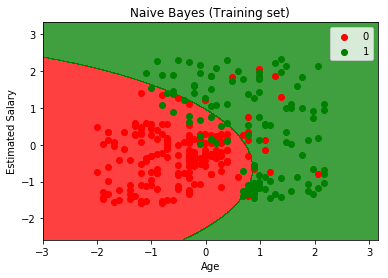

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualizing the Test set results

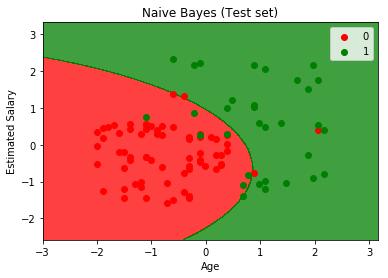

In [20]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()